### Analysis of Dogecoin Stock Prices over the years using Python libraries(NumPy, Pandas, Matplotlib and Seaborn).

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# visualization
import seaborn as sns

# Importing the dataset
df = pd.read_csv('DOGE-USD.csv')

# list of first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


## Inference:
<ol>
    <li>Libraries Import: The code imports essential libraries for data manipulation and visualization, including pandas (pd), numpy (np), and matplotlib (plt). Additionally, seaborn (sns) is imported for enhanced data visualization.</li>
    <li>Dataset Loading: The code uses pd.read_csv() to load the Dogecoin historical dataset from a CSV file named "DOGE-USD.csv" into a pandas DataFrame (df). This assumes that the dataset is in CSV format.</li>
    <li>Displaying the First 5 Rows: The head() function is used to display the first 5 rows of the loaded dataset. This provides a quick preview of the data structure, column names, and initial values.</li>
</ol>

In [2]:
# list of last five rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2159,2023-10-08,0.061456,0.061611,0.060876,0.061008,0.061008,92483679
2160,2023-10-09,0.061010,0.061030,0.058260,0.058779,0.058779,241183528
2161,2023-10-10,0.058779,0.059204,0.058608,0.059025,0.059025,123311323
2162,2023-10-11,0.059041,0.059454,0.057813,0.058470,0.058470,146066511
2163,2023-10-12,0.058470,0.058488,0.057500,0.057771,0.057771,120287472


## Inference:
Displaying the last 5 rows.

In [3]:
# shape
df.shape

(2164, 7)

## Inference: 
Dataset comprises 2164 rows and 7 columns.

In [4]:
# information about the columns and their corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2164 non-null   object 
 1   Open       2164 non-null   float64
 2   High       2164 non-null   float64
 3   Low        2164 non-null   float64
 4   Close      2164 non-null   float64
 5   Adj Close  2164 non-null   float64
 6   Volume     2164 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.5+ KB


##  Inference:
No Variable column has null/missing values.

In [5]:
# statistical summary of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2.164000e+03
mean,0.062426,0.065708,0.059261,0.062462,0.062462,9.358082e+08
std,0.091750,0.098803,0.084913,0.091797,0.091797,3.246002e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002656,0.002722,0.002597,0.002657,0.002657,3.645901e+07
50%,0.005992,0.006431,0.005719,0.006014,0.006014,1.645669e+08
75%,0.080191,0.082483,0.077584,0.080190,0.080190,6.216320e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


## Inference:
<ol>
    <li>The values in the "count" row are all 2164, indicating that there are no missing values in any of the numerical columns.</li>
    <li>The "mean" row provides the average values for each column.</li>
    <li>The "std" row shows the standard deviation, giving a measure of the variability or spread of the data.</li>
    <li>The "min" and "max" rows display the minimum and maximum values, respectively.</li>
    <li>"25%", "50%", and "75%" rows represent the quartiles, providing insights into the distribution of the data.</li>
</ol>

In [6]:
# number of unique users and items in the dataset.
df.nunique()

Date         2164
Open         1933
High         1938
Low          1924
Close        1941
Adj Close    1941
Volume       2164
dtype: int64

## Inference:
<ol>
    <li>Date: There are 2164 unique dates in the dataset. This implies that each row corresponds to a different date, and there are no duplicate dates.</li>
    <li>Open, High, Low, Close, Adj Close: These columns represent numerical values (likely prices) for each date. The counts of unique values vary, indicating that there are repeated values in these columns. This is expected for financial data where prices may remain the same on multiple days.</li>
    <li>Volume: There are 2164 unique volume values. This suggests that each row has a distinct volume value, and there are no duplicate volume entries.</li>
</ol>

In [7]:
# checking for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Inference:
<ol>
    <li>There are no missing values (null values) in any of the columns.</li>
    <li>Each column has a count of 0, indicating that the dataset is complete, and there are no entries with missing data.</li>
</ol>

In [8]:
# checking for duplicate values
duplicate_rows = df[df.duplicated()].reset_index(drop=True)
print(duplicate_rows)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


## Inference:
<ol>
    <li>Checking for Duplicate Rows: The df.drop_duplicated() function is used to check for duplicate rows from the DataFrame based on all columns. Duplicate rows are those where all column values are identical.</li>
    <li>Resetting Index: The df.reset_index(drop=True) function is then used to reset the index of the DataFrame after removing duplicates.</li>
</ol>

In [9]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,9,11,2017
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,10,11,2017
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,11,11,2017
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,12,11,2017
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,13,11,2017


## Inference: 
Converting the Date column to datetime object and splitting it into Day, Month and Year.

In [10]:
#removing date column
df = df.drop('Date', axis=1)

# show the modified data frame
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,9,11,2017
1,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,10,11,2017
2,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,11,11,2017
3,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,12,11,2017
4,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,13,11,2017


## Inference: 
Dropping the Date column and checking if it is dropped by printing the first 5 rows using head() function.

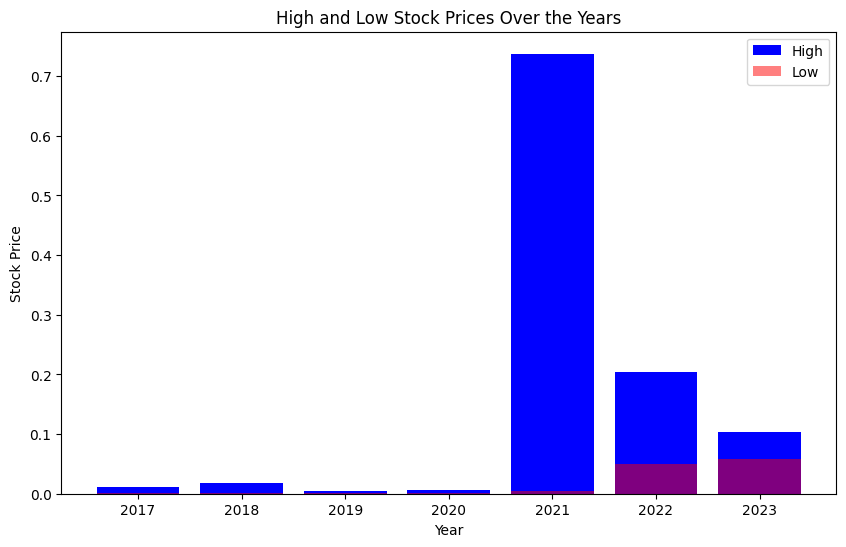

In [11]:
# Group by Year and find the maximum High and minimum Low values for each year
max_high_per_year = df.groupby('Year')['High'].max()
min_low_per_year = df.groupby('Year')['Low'].min()

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for highest stock price over the years
plt.bar(max_high_per_year.index, max_high_per_year.values, color='blue', label='High')
# Bar plot for lowest stock price over the years
plt.bar(min_low_per_year.index, min_low_per_year.values, color='red', label='Low', alpha=0.5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('High and Low Stock Prices Over the Years')
plt.legend()

# Show the plot
plt.show()

## Inference: 
<ol>
    <li>The bar plot showcases the fluctuation of highest and lowest stock prices over the years.</li>
    <li>Here, we see that the year 2021 has the highest and lowest stock prices.</li>
</ol>

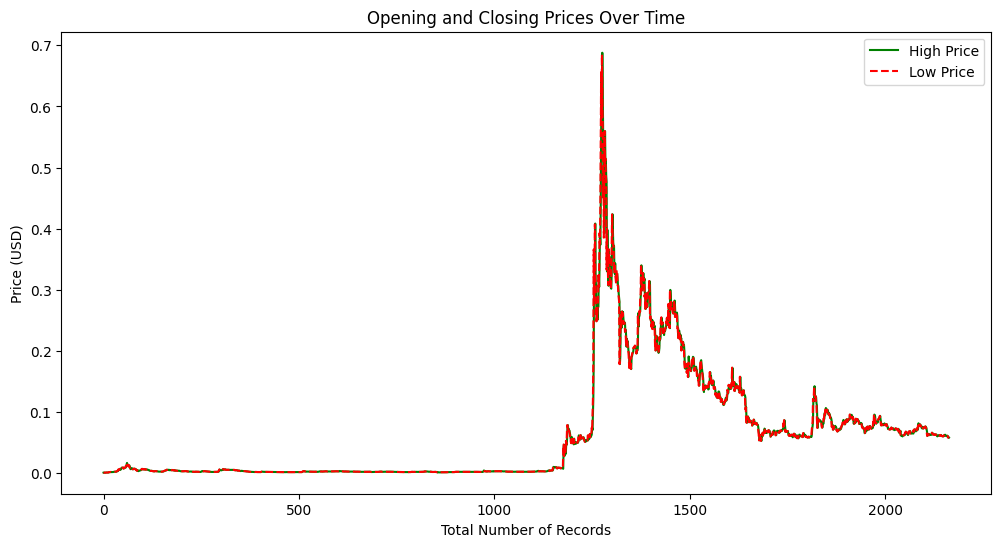

In [12]:
# Line plot of High and Low prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='High Price', color='green')
plt.plot(df.index, df['Close'], label='Low Price', color='red', linestyle='dashed')
plt.title('Opening and Closing Prices Over Time')
plt.xlabel('Total Number of Records')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Inference: 
The line plot showcases the fluctuation of opening and closing prices.

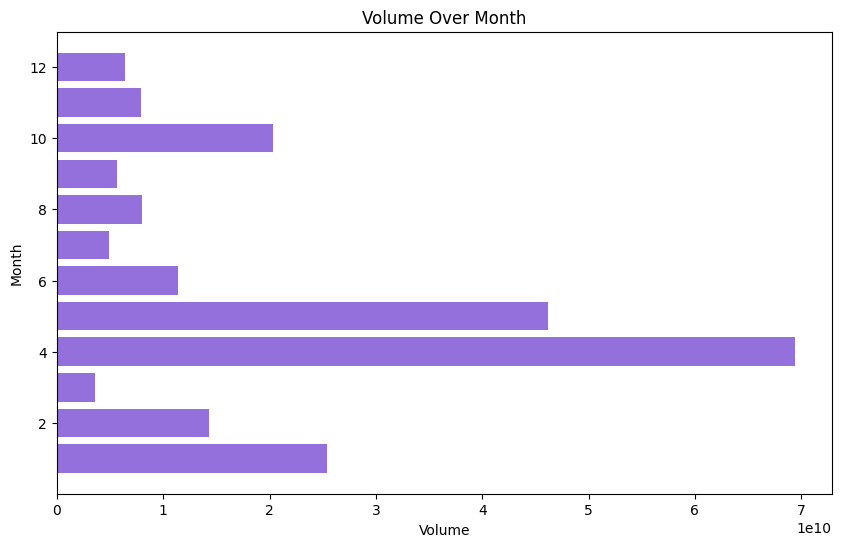

In [13]:
 # Horizontal bar plot for Volume
plt.figure(figsize=(10, 6))
plt.barh(df['Month'], df['Volume'], color='mediumpurple')

# Adding labels and title
plt.xlabel('Volume')
plt.ylabel('Month')
plt.title('Volume Over Month')

# Show the plot
plt.show()

## Inference:
<ol>
    <li>The horizontal bar plot showcases the volume of the stock prices over the months.</li>
    <li>Here, we see that the months of April and May has the largest volume of stock prices.</li>
</ol>

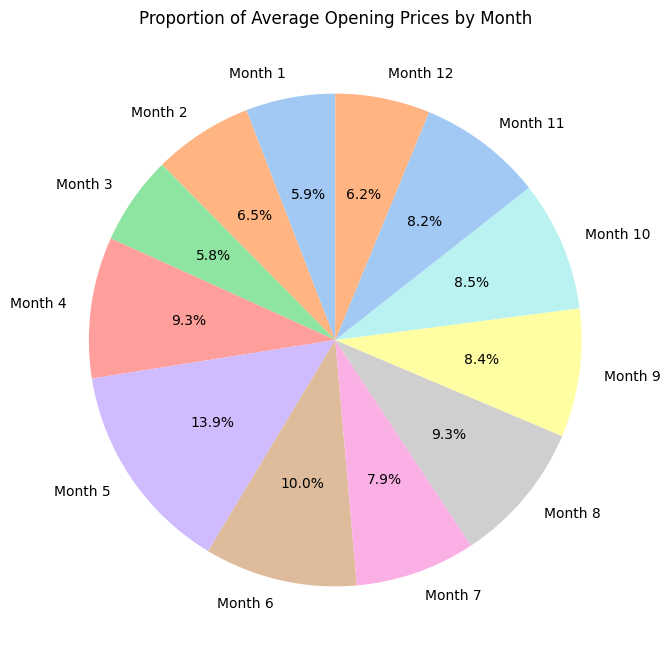

In [14]:
# Pie chart for the proportion of average opening prices by month
plt.figure(figsize=(8, 8))
average_opening_by_month = df.groupby('Month')['Open'].mean()

# Extracting labels and values
labels = [f'Month {month}' for month in average_opening_by_month.index]
values = average_opening_by_month.values

# Plotting the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proportion of Average Opening Prices by Month')
plt.show()

## Inference:
The pie chart illustrates the proportional distribution of average opening prices for each month in the dataset. Each wedge represents the contribution of a specific month to the total average opening price, providing a visual summary of the monthly variations in opening prices.

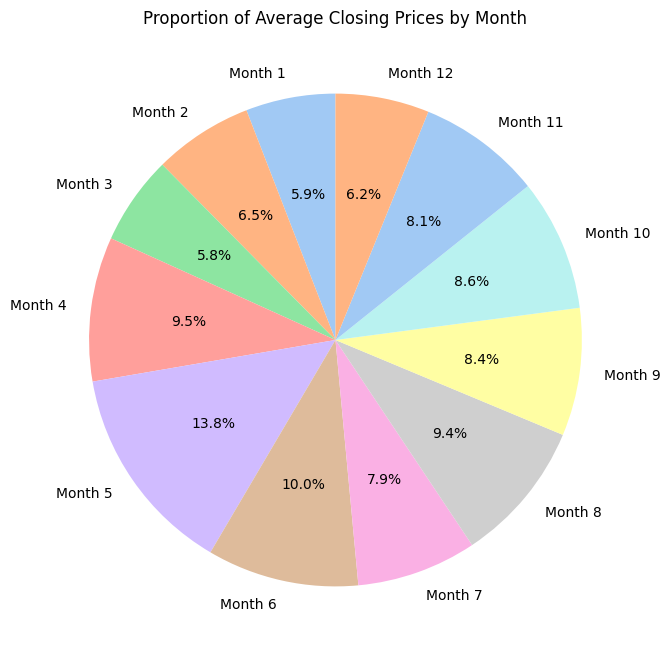

In [15]:
# Pie chart for the proportion of average closing prices by month
plt.figure(figsize=(8, 8))
average_closing_by_month = df.groupby('Month')['Close'].mean()

# Extracting labels and values
labels = [f'Month {month}' for month in average_closing_by_month.index]
values = average_closing_by_month.values

# Plotting the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proportion of Average Closing Prices by Month')
plt.show()

## Inference:
The pie chart illustrates the distribution of average closing prices across different months. Each segment corresponds to the proportion of the total average closing price contributed by a specific month. This visual summary provides insights into the relative significance of each month in shaping the overall average closing price trends.

In [ ]:
# Filter the data for the year 2021
df_2021 = df[df['Year'] == 2021]

# Find the highest price for each month in 2021
highest_price_per_month = df_2021.groupby('Month')['High'].max()

# Plotting a bar plot
plt.figure(figsize=(12, 6))
plt.bar(highest_price_per_month.index, highest_price_per_month.values, color='lightcoral')
plt.title('Highest Price in 2021 by Month')
plt.xlabel('Month')
plt.ylabel('Highest Price (USD)')
plt.show()

## Inference
<ol>
    <li>The bar plot showcases the month wise prices of the year 2021.</li>
    <li>Here, we see that the month of May has the highest stock prices and the month of March has the lowest stock prices.</li>
</ol>

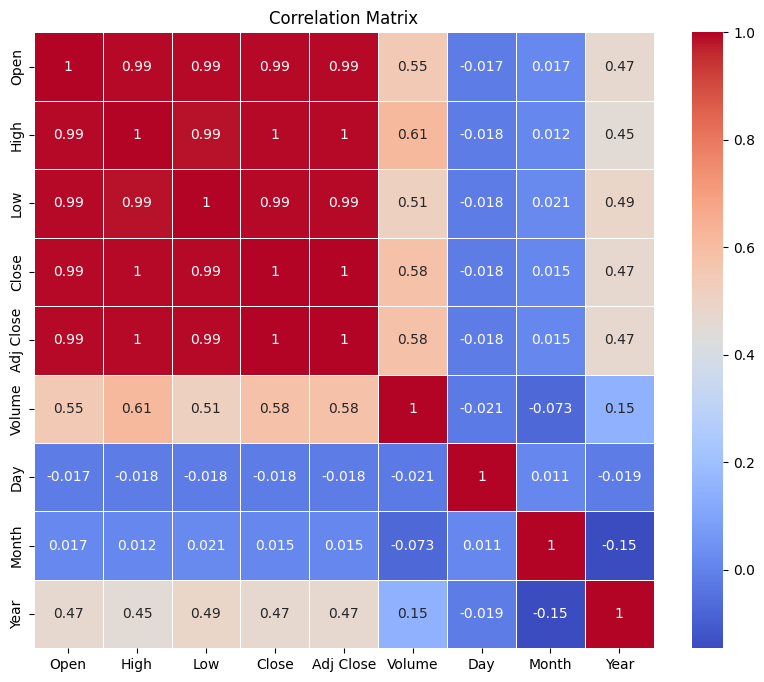

In [106]:
# Creating a heatmap to visualize correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Inference: 
1. **Strength and Direction of Correlation:** The colors in the heatmap
   represent the strength and direction of the correlation between pairs of variables. Positive correlations are indicated by warmer colors (e.g., red), while negative correlations are represented by cooler colors (e.g., blue).

2. **Correlation Coefficients:** The numerical values within each cell of the
   heatmap represent the correlation coefficients. These values range from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. A value near 0 suggests a weak correlation.

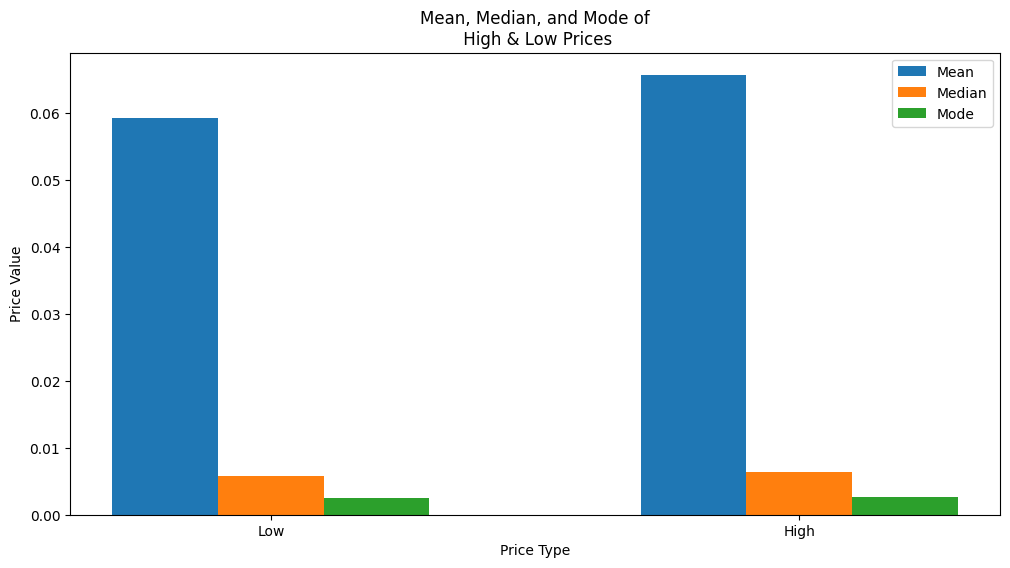

In [107]:
# Calculate mean, median, and mode for low and high prices
low_mean = df['Low'].mean()
low_median = df['Low'].median()
low_mode = df['Low'].mode()[0]

high_mean = df['High'].mean()
high_median = df['High'].median()
high_mode = df['High'].mode()[0]

# Create a bar chart
labels = ['Low', 'High']
mean_values = [low_mean, high_mean]
median_values = [low_median, high_median]
mode_values = [low_mode, high_mode]

plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(labels))

plt.bar(index, mean_values, width=bar_width, label='Mean')
plt.bar([i + bar_width for i in index], median_values, width=bar_width, label='Median')
plt.bar([i + 2 * bar_width for i in index], mode_values, width=bar_width, label='Mode')

plt.xlabel('Price Type')
plt.ylabel('Price Value')
plt.title('Mean, Median, and Mode of\n High & Low Prices')
plt.xticks([i + bar_width for i in index], labels)
plt.legend()
plt.show()

## Inference

Mean, median, and mode are statistical measures used to describe the central tendency of a dataset.
**MEAN:** It Analyses trends could indicate the overall direction or average movement of Dogecoin's highest and lowest prices.
**MEDIAN:** It provides a clear view of how the median high and low prices are distributed over time, highlighting any outliers or patterns in their variability.
**MODE:** It Visualise the most frequent high and low price levels can help identify common price ranges where Dogecoin tends to reach its highest and lowest values more frequently.

## Conclusion
• The dataset contains information about Dogecoin stock prices, including opening, closing, high, and low prices, along with volume and adjusted close values.

• There are 2164 entries and 7 columns in the dataset.

• The describe() function provides statistical information such as mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for numerical columns.
Data Cleaning:

• No duplicate rows were found in the dataset.
The 'Date' column was converted to a datetime format, and additional columns for day, month, and year were created.
The 'Date' column was dropped from the dataset.
Yearly Analysis:

• Bar plot showing the highest and lowest stock prices for each year.
From the bar plot, it can be observed that the highest stock prices generally increased over the years.
Opening and Closing Prices Over Time:

• Line plot displaying the opening and closing prices over the entire dataset.
The plot shows the fluctuation in opening and closing prices over time.
Volume Over Months:

• Horizontal bar plot illustrating the volume of Dogecoin transactions each month.
Some months have higher transaction volumes compared to others.
Correlation Matrix:

• A heatmap visualizing the correlation between numerical features.
Features such as 'Open', 'High', 'Low', 'Close', and 'Adj Close' are highly correlated, which is expected.
Average Opening and Closing Prices by Month:

• Bar plots showing the average opening and closing prices for each month.
The average opening and closing prices for each month provide insights into the monthly trends.
Highest Price in 2021 by Month:

• Bar plot showing the highest Dogecoin price for each month in the year 2021.
This plot indicates the variation in the highest price over different months in 2021.

• The Dogecoin stock prices were high during 2021, beacause of the following reaons:

    → Economic Conditions

    → Company Performance

    → Industry Trends

    → Market Sentiment

    → Global Events

    → Investor Confidence

    → Monetary Policy